# Entrega del módulo 2. Aprendizaje estadístico.

## <font color="red"> Fecha límite 15 de junio de 2019 </font>

La entrega de la práctica del módulo de aprendizaje estadístico se divide en tres etapas. Las etapas van de menos a más en términos de dificultad, y el hecho de pasarlas hará que se consigan más puntos en la nota final.

* __Etapa 1 (5 puntos)__: Analizar los resultados de un contraste de hipótesis para dos poblaciones independientes (t-test) cuando hacemos variar el tamaño muestral.
* __Etapa 2 (3 puntos)__: Aplicar un t-test a un conjunto de datos reales.
* __Etapa 3 (2 puntos)__: Aplicar un modelo jerárquico Bayesiano al conjunto de datos reales de la Etapa 2.

Para poder evaluar la práctica habrá que entregar dos archivos comprimidos en formato zip. El primer  archivo .py contendrá el código a ejecutar en cada una de las etapas; el segundo archivo .csv contendrá el conjunto de datos reales utilizado en las etapas 2 y 3.

El archivo .py que hay que entregar puede escribirse con el programa [Spyder](https://www.spyder-ide.org/), por ejemplo.

Especificamos qué debe entregarse en cada una de las etapas para conseguir los puntos asignados en las mismas:

### __Etapa 1__

En esta etapa el objetivo es entender __cómo influye el tamaño muestral__ en un t-test para dos poblaciones independientes. O de otro modo, fijado $\alpha = 0.05$, qué decisión tomamos (rechazar o no $H_0$) suponiendo que todas las demás hipótesis se cumplen (normalidad e igualdad de varianzas), en unos datos simulados para los que se han dejado fijas las medias y deviaciones típicas, y hacemos variar los tamaños muestrales.

Para ayudaros podéis utilizar el código que aparece a continuación, en el que se plantea el contraste

$$\begin{cases}
            H_0 :& \mu_1 = \mu_2 \\
            H_1 :&  \mu_1 \neq \mu_2
\end{cases}$$

Estadístico=-14.142, p-valor=0.000
ESTA ES LA GRÁFICA DE LAS DISTRIBUCIONES


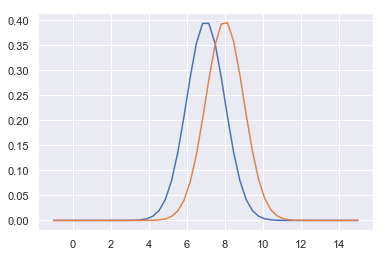

,sueldos_hombres,sueldos_mujeres
count,500.000000,500.000000
mean,6.977199,7.958064
std,0.993221,0.956076
min,4.040441,5.010785
25%,6.301046,7.320920
50%,6.919963,7.975138
75%,7.681339,8.546346
max,9.631552,10.914933


In [47]:
import scipy.stats as st
import matplotlib.pylab as plt 
import numpy as np
import pandas as pd

X1 = st.norm(loc=7., scale=1.)  # Dejamos fijas la media y desviación típica
X2 = st.norm(loc=8., scale=1.)  # Dejamos fijas la media y desviación típica

sueldos_hombres = X1.rvs(500)  # Tamaño muestral 500
sueldos_mujeres = X2.rvs(300)  # Tamaño muestral 300

T, p = st.ttest_ind(sueldos_hombres, sueldos_mujeres, equal_var = True)
print('Estadístico=%.3f, p-valor=%.3f' % (T, p))

print("ESTA ES LA GRÁFICA DE LAS DISTRIBUCIONES")
x = np.linspace(-1, 15)

plt.plot(x,st.norm.pdf(x,loc=7.,scale=1))
plt.plot(x,st.norm.pdf(x,loc=8.,scale=1))
plt.show()


dataset = pd.DataFrame({'sueldos_hombres': X1.rvs(500), 'sueldos_mujeres': X2.rvs(500)})
dataset.describe()

Obtenemos un p_valor= 0,000 < 0,05 por lo que podemos rechazar la hipótesis nula.

Esto es, no podemos considerar que las medias de las dos poblaciones sean iguales ya que las
muestras no ofrecen un contraste significativo.
A partir del nivel de significación delimitamos la zona de aceptación y de rechazo.
El p-valor puede considerarse como el valor límite para que un contraste sea significativo, 
es decir, elegido un nivel de significación α, se rechazará H0 si p_valor ≤ α.



Como se trata de un contraste de poblaciones independientes con datos sintéticos que generamos con la distribución Normal
y con la misma desviación típica (1), logicamente no tengo que comprobar nada, pero si se tratara de un problema real
sí debería asegurame de la normalidad y de la igualdad de las varianzas antes de hacer el contraste


Probamos a aumentar el tamaño de las muestras para ver cómo influye en el contraste bilateral

In [48]:


X1 = st.norm(loc=7., scale=1.)  # Dejamos fijas la media y desviación típica
X2 = st.norm(loc=8., scale=1.)  # Dejamos fijas la media y desviación típica

sueldos_hombres = X1.rvs(5000)  # Tamaño muestral 5000
sueldos_mujeres = X2.rvs(3000)  # Tamaño muestral 3000

T, p = st.ttest_ind(sueldos_hombres, sueldos_mujeres, equal_var = True)
print('Estadístico=%.3f, p-valor=%.3f' % (T, p))
print(st.ttest_ind(sueldos_hombres,sueldos_mujeres))



Estadístico=-42.487, p-valor=0.000
Ttest_indResult(statistic=-42.487492729252175, pvalue=0.0)



De la misma manera que antes, obtenemos un p_valor= 0,000 < 0.05 por lo que podemos rechazar la hipótesis nula,
esto es que no podemos aceptar igualdad de medias.

Subiendo el tamaño muestral se incrementa la capacidad del contraste para diferenciar H0 y H1.



Ahora probamos a reducir el tamaño de las muestras para ver cómo influye en el contraste bilateral

In [49]:

X1 = st.norm(loc=7., scale=1.)  # Dejamos fijas la media y desviación típica
X2 = st.norm(loc=8., scale=1.)  # Dejamos fijas la media y desviación típica



sueldos_hombres = X1.rvs(50)  # Tamaño muestral 50
sueldos_mujeres = X2.rvs(60)  # Tamaño muestral 60

T, p = st.ttest_ind(sueldos_hombres, sueldos_mujeres, equal_var = True)
print('Estadístico=%.3f, p-valor=%.3f' % (T, p))



Estadístico=-5.571, p-valor=0.000



De la misma manera que antes, obtenemos un p_valor= 0,000 por lo que podemos rechazar la hipótesis nula,
esto es que no podemos aceptar igualdad de medias.


Se observa que con muestras pequeñas podría darse el caso de que el t-test devuelva un p_valor que permita no rechazar H0
lo que indicaría que podríamos aceptar que las medias son iguales.

En este caso p_valor=0,079 > 0,05

In [50]:


X1 = st.norm(loc=7., scale=1.)  # Dejamos fijas la media y desivación típica
X2 = st.norm(loc=8., scale=1.)  # Dejamos fijas la media y deviación típica

sueldos_hombres = X1.rvs(3)  # Tamaño muestral 3
sueldos_mujeres = X2.rvs(3)  # Tamaño muestral 3

print(sueldos_hombres)
print(sueldos_mujeres)
T, p = st.ttest_ind(sueldos_hombres, sueldos_mujeres, equal_var = True)
print('Estadístico=%.3f, p-valor=%.3f' % (T, p))
print(st.ttest_ind(sueldos_hombres,sueldos_mujeres))




[4.83471363 6.5880041  6.48444182]
[5.84957987 6.63885117 7.47434878]
Estadístico=-0.930, p-valor=0.405
Ttest_indResult(statistic=-0.9301908619630531, pvalue=0.4049268877011059)



El tamaño de la muestra es importante. Manteniendo constante α , al aumentar el tamaño de la muestra 
decrece el valor del estimador y por tanto la capacidad del contraste para distinguir H0 y H1.

Si tomamos una muestra muy pequeña puede darse el caso de no rechazar H0 de manera incorrecta ya que puede darse la casualidad de que en la muestra sí se cumpla la hipotesis pero en la población no.

### __Etapa 2__

En esta etapa se os pide que reproduzcáis (cortar y pegar código) el ejemplo con datos reales que hay en el notebook 05-EstudiosAnaliticos.ipynb dentro de la sección __Contrastes paramétricos en dos poblaciones normales INDEPENDIENTES__ para vuetros propios datos.

El ejemplo al que me refiero comienza con las líneas de código

```python
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT5/master/data/drinks.csv')
drinks.boxplot(column='beer_servings', by='continent');
```

Debeís cargar vuestro propio conjunto de datos y __comprobar las hipótesis del t-test__. Se evaluará:

1. Que habéis comprobado la Normalidad de los datos de cada una de las muestras (Shapiro-Wilk).
2. Que habéis comprobado la de igualdad de varianzas (Levene o Barlett).
3. Que planteáis un contraste para la igualdad de medias (t-test) y que decidís de manera adecuada.

Queremos hacer un contraste de hipótesis a través del cual podamos asegurar si la media de las ventas de la marca ACER 
es igual que la media de las ventas de la marca ASUS en un determinado periodo de tiempo.

Contamos con el conjunto de datos VENTASORDENADORES compuesto por tres columnas, codigo de producto, ventas y marca del producto.

     codigo_producto  ventas   marca
0         5071600018       0  LENOVO
1         5071600029       0      HP
2         5071600381       0  LENOVO
3         5071600447       8  LENOVO
4         5071600470      17    ACER
5         5071600555      22      HP
6         5071600604      22      HP
7         5071600610       1      HP
8         5071600613       0      HP
9         5071600621      18      HP
10        5071600627       0      HP
11        5071600629      52  LENOVO
12        5071600657      65  LENOVO
13        5071600662      22  LENOVO
14        5071600753      90  LENOVO
15        5071600758      15  LENOVO
16        5071600769      30    ASUS
17        5071600775      22    ACER
18        5071600868      18    ACER
19        5071600910      12    ACER
20        5071600932      25    ASUS
21        5071600957      34    ASUS
22        5071600998      15    ACER
23        5071601019      30    ASUS
24        5071633791      30    ASUS
25        5071633959      50    ASUS
2

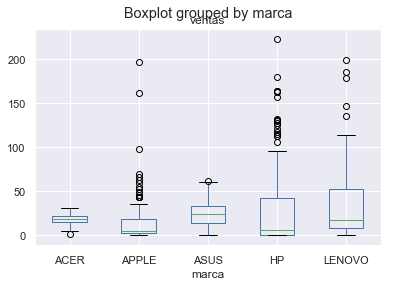

In [51]:

import pandas as pd

ordenadores = pd.read_csv('C:/Users/56123458/Desktop/MODULO 2/PRACTICA/VENTASORDENADORES.csv', delimiter=";")
print(ordenadores)

ordenadores.boxplot(column='ventas', by='marca');

Observamos con la representación del box-plot por marca que las ventas que más se parecen son ASUS Y ACER  por lo que serán las marcas que emplearemos para el contraste. 


De todas maneras pasaremos el test de Shapiro_Wilks para las 5 muestras y determinamos las que cumplen con la condición de Normalidad

In [52]:
muestra1 = ordenadores[ordenadores.marca=='ACER']
muestra2 = ordenadores[ordenadores.marca=='APPLE']
muestra3 = ordenadores[ordenadores.marca=='ASUS']
muestra4 = ordenadores[ordenadores.marca=='HP']
muestra5 = ordenadores[ordenadores.marca=='LENOVO']



In [53]:
W, p = st.shapiro(muestra1.ventas)
print('Estadístico=%.3f, p-valor=%.3f' % (W, p))

Estadístico=0.977, p-valor=0.369


In [54]:
W, p = st.shapiro(muestra2.ventas)
print('Estadístico=%.3f, p-valor=%.3f' % (W, p))

Estadístico=0.573, p-valor=0.000


In [55]:
W, p = st.shapiro(muestra3.ventas)
print('Estadístico=%.3f, p-valor=%.3f' % (W, p))

Estadístico=0.977, p-valor=0.070


In [56]:
W, p = st.shapiro(muestra4.ventas)
print('Estadístico=%.3f, p-valor=%.3f' % (W, p))

Estadístico=0.708, p-valor=0.000


In [57]:
W, p = st.shapiro(muestra5.ventas)
print('Estadístico=%.3f, p-valor=%.3f' % (W, p))

Estadístico=0.758, p-valor=0.000


Ahora viendo que las muestras 1 y 3 cumplen el test de Normalidad fijado alfa=0,05,  emplearemos Bartlett para comprobar si podemos considerar igualdad de varianzas en nuestras muestras.

In [58]:
st.bartlett(muestra1.ventas, muestra3.ventas) 

BartlettResult(statistic=32.38365381500248, pvalue=1.2654649531574535e-08)

El test de Bartlett arroja un p_valor=0,000.


Probaremos otro test para corroborar el dato ya que hay desviaciones significativas de normalidad. En este caso podemos utilizar Levene.

In [59]:
st.levene(muestra1.ventas, muestra3.ventas, center='mean') 



LeveneResult(statistic=23.384415329678987, pvalue=3.154195166130068e-06)

En ambos casos (Levene y Bartlett) el test es significativo, es decir, hay evidencia con la muestra suministrada para asegurar 
que las varianzas son diferentes.



Por tanto, en el contraste de medias habrá que utilizar equal_var=False

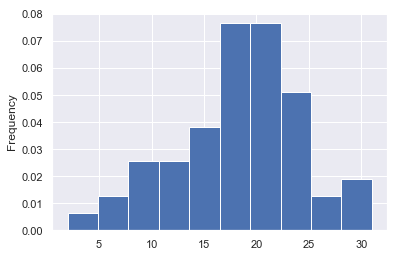

In [60]:
muestra1.ventas.plot(kind='hist', density=True); 

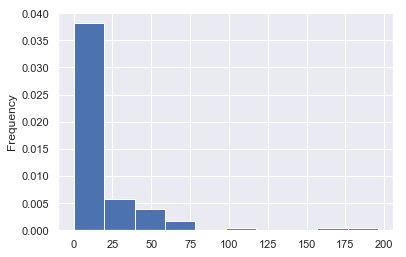

In [61]:
muestra2.ventas.plot(kind='hist', density=True); 

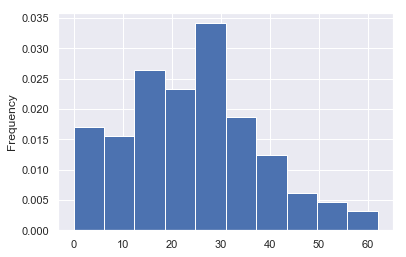

In [62]:
muestra3.ventas.plot(kind='hist', density=True); 

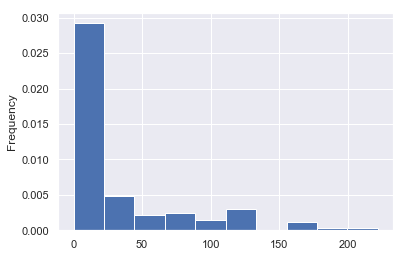

In [63]:
muestra4.ventas.plot(kind='hist', density=True); 

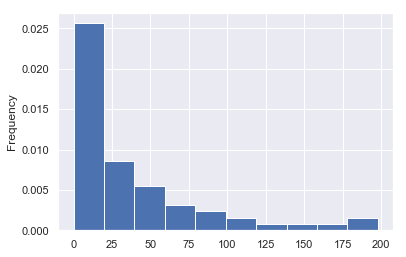

In [64]:
muestra5.ventas.plot(kind='hist', density=True);

In [65]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(muestra3.ventas))
st.normaltest(muestra3.ventas)

0.30042369694386645


NormaltestResult(statistic=2.841870286430971, pvalue=0.24148808532969818)

In [66]:
st.ttest_ind(muestra1.ventas, muestra3.ventas) #solo las muestras 1 y 3 son normales

Ttest_indResult(statistic=-2.8755505337284766, pvalue=0.0045972680455184465)

Al hacer el test que prueba igualdad de varianzas hemos obtenido un p_valor< 0,05 por lo que debemos indicar que las VARIANZAS NO SON IGUALES (equal_var= false) 



In [67]:
st.ttest_ind(muestra1.ventas, muestra3.ventas, equal_var = False) 

Ttest_indResult(statistic=-3.537912522351845, pvalue=0.0005327378049706817)


El resultado es p_valor< 0,0005 por lo que finalmente determinamos que hay evidencia de que la media de ventas de la marca
ASUS no es igual a la media de ventas de la marca ACER con la muestra tomada.

Rechazamos la hipótesis HO: 𝜇1 =𝜇2. 


In [37]:
st.mannwhitneyu(muestra4.ventas, muestra2.ventas) #para contraste no paramétrico si no cumplen las condiciones de poblaciones independientes y
# que siguen una distribución Normal

MannwhitneyuResult(statistic=14666.0, pvalue=0.13636648509313676)

### __Etapa 3__

En esta etapa se os pide que comparéis la decisión tomada con el t-test del ejercicio anterior (Etapa 2) con la decisión que tomaríais al utilizar un modelo jerárquico Bayesiano. Para ello tendréis que cortar y pegar el código de la sección __Sustituyendo el contraste para dos poblaciones independientes por la inferencia Bayesiana__ en el notebook 06-InferenciaBayesiana.ipynb, y obtener un intervalo plausible al 95% de probabilidad (95% HDP) para la diferencia de medias en vuestros datos.

La inferencia bayesiana usa un estimador numérico del grado de creencia en una hipótesis aún antes de observar la evidencia y calcula un estimador numérico del grado de creencia en la hipótesis después de haber observado la evidencia. La inferencia bayesiana generalmente se basa en grados de creencia, o probabilidades subjetivas, en el proceso de inducción y no necesariamente declara proveer un método objetivo de inducción. 



In [68]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
pylab.rcParams['figure.figsize'] = (10, 6)
import matplotlib.pyplot as plt
#plt.style.use('ggplot')



Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [85]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns # Para dibujar distribuciones con poco código
sns.set(color_codes=True)
#import scipy.stats as st

import pymc3 as pm  # http://docs.pymc.io/index.html

    

In [70]:
st.ttest_ind(muestra1.ventas, muestra3.ventas, equal_var = False)




Ttest_indResult(statistic=-3.537912522351845, pvalue=0.0005327378049706817)

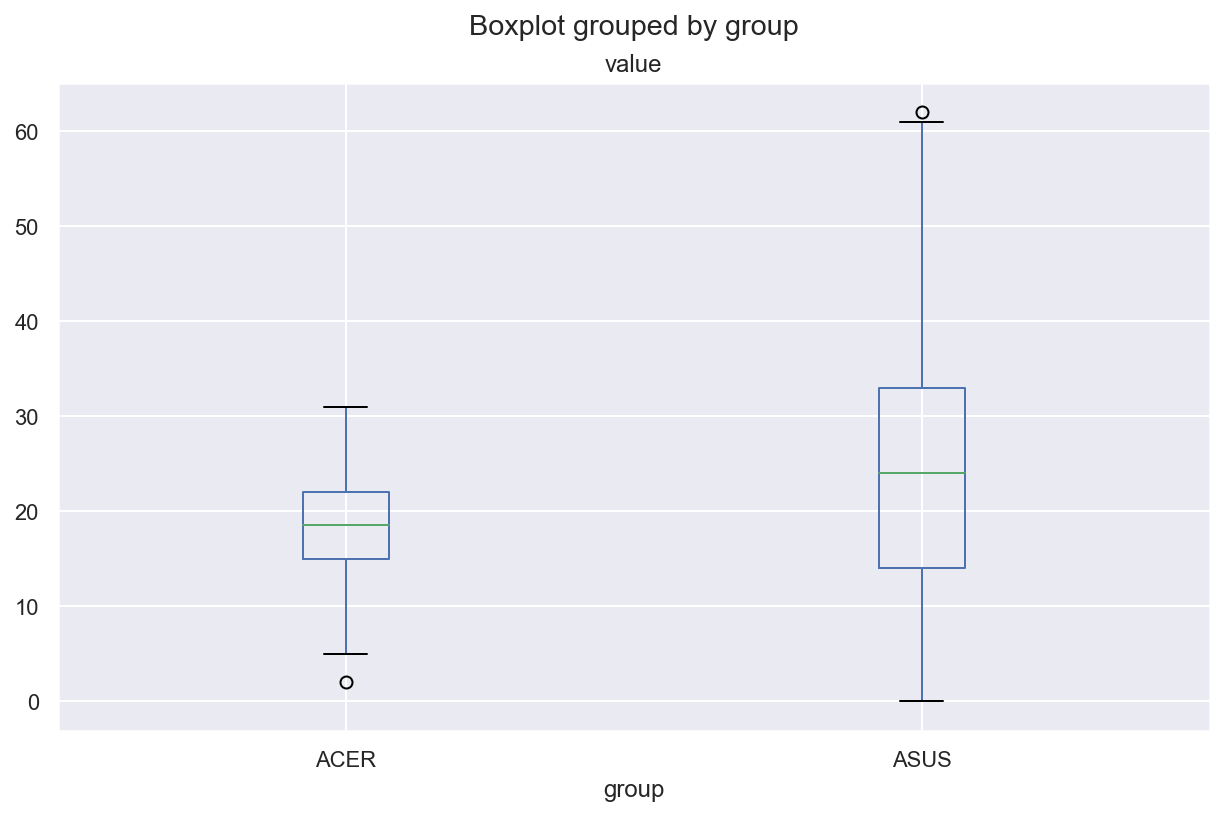

In [71]:
y1 = muestra1.ventas
y2 = muestra3.ventas
y = pd.DataFrame(dict(value=np.r_[muestra1.ventas, muestra3.ventas],group=np.r_[['ACER']*len(y1), ['ASUS']*len(y2)]))


y.boxplot('value', by='group')

In [92]:

"""Definimos el modelo probabilístico a priori"""
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    ACER_mean = pm.Normal('ACER_mean', μ_m, sd=μ_s)
    ASUS_mean = pm.Normal('ASUS_mean', μ_m, sd=μ_s)

In [93]:
σ_low = 1
σ_high = 1000

with model:
    ACER_std = pm.Uniform('ACER_std', lower=σ_low, upper=σ_high)
    ASUS_std = pm.Uniform('ASUS_std', lower=σ_low, upper=σ_high)

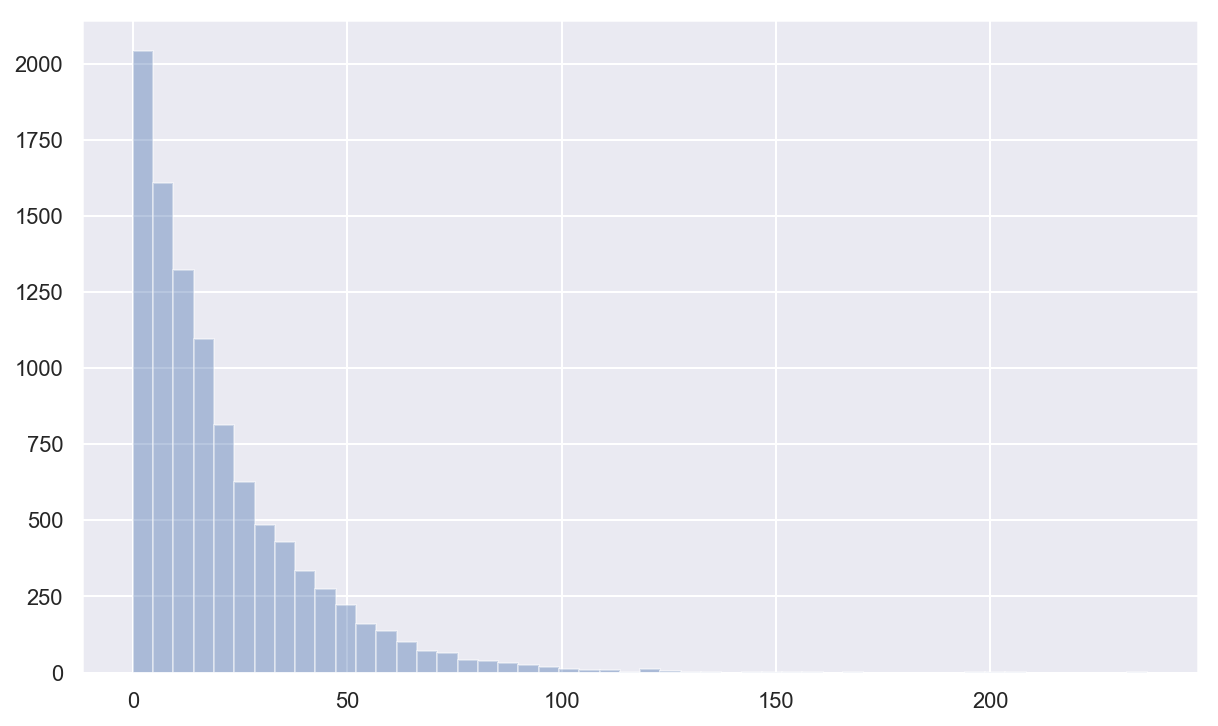

In [94]:
with model:
    ν = pm.Exponential('ν_minus_one', 1/29.) + 1

sns.distplot(np.random.exponential(20, size=10000), kde=False)

In [95]:
with model:
    λ1 = ACER_std**(-2)
    λ2 = ASUS_std**(-2)
    group1 = pm.StudentT('ACER', nu=ν, mu=ACER_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT('ASUS', nu=ν, mu=ASUS_mean, lam=λ2, observed=y2)


In [76]:
with model:
    diff_of_means = pm.Deterministic('difference of means', ACER_mean - ASUS_mean)
    diff_of_stds = pm.Deterministic('difference of stds', ACER_std - ASUS_std)
    effect_size = pm.Deterministic('effect size',diff_of_means / np.sqrt((ACER_std**2 + ASUS_std**2) / 2))

In [82]:
""""Paso 2: Actualizamos el modelo a partir de las observaciones"""
with model:
    trace = pm.sample(1000)
#La probabilidad de aceptación no coincide con el objetivo marcado. Es 0.88239254646495272745, pero debería estar cerca de 0.8 por lo quevamos a aumentar el número de pasos a 3000.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, ASUS_std, ACER_std, ASUS_mean, ACER_mean]
Sampling 4 chains: 100%|██████████| 6000/6000 [08:20<00:00,  9.84draws/s] 


In [98]:
with model:
    trace = pm.sample(3000,chains = 2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [ν_minus_one, ASUS_std, ACER_std, ASUS_mean, ACER_mean]
Sampling 2 chains: 100%|██████████| 7000/7000 [12:48<00:00,  7.33draws/s] 


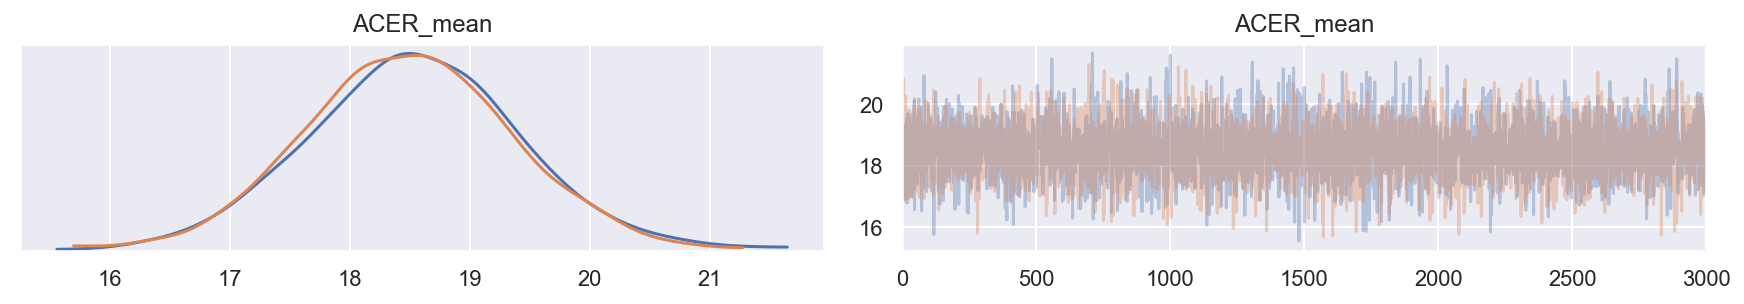

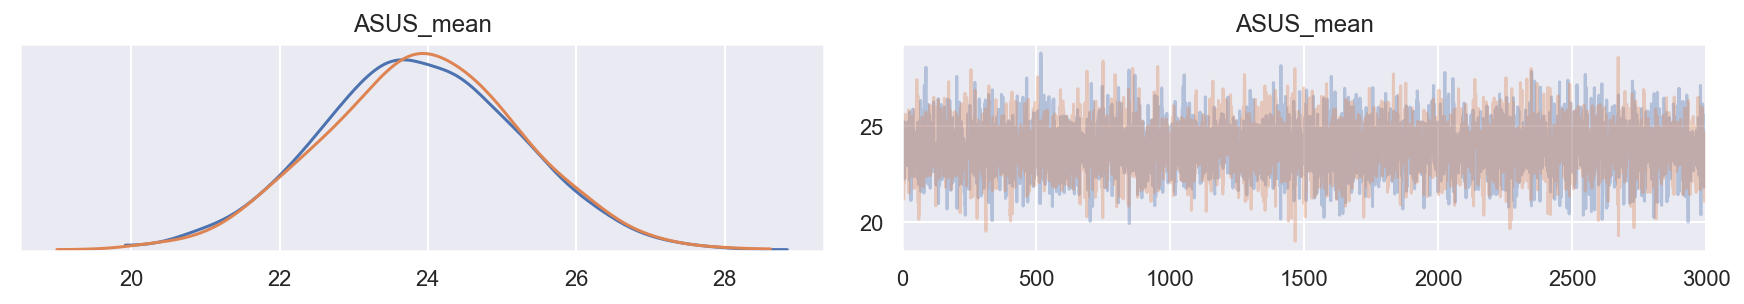

In [99]:
pm.traceplot(trace, var_names=['ACER_mean']);
pm.traceplot(trace, var_names=['ASUS_mean']);

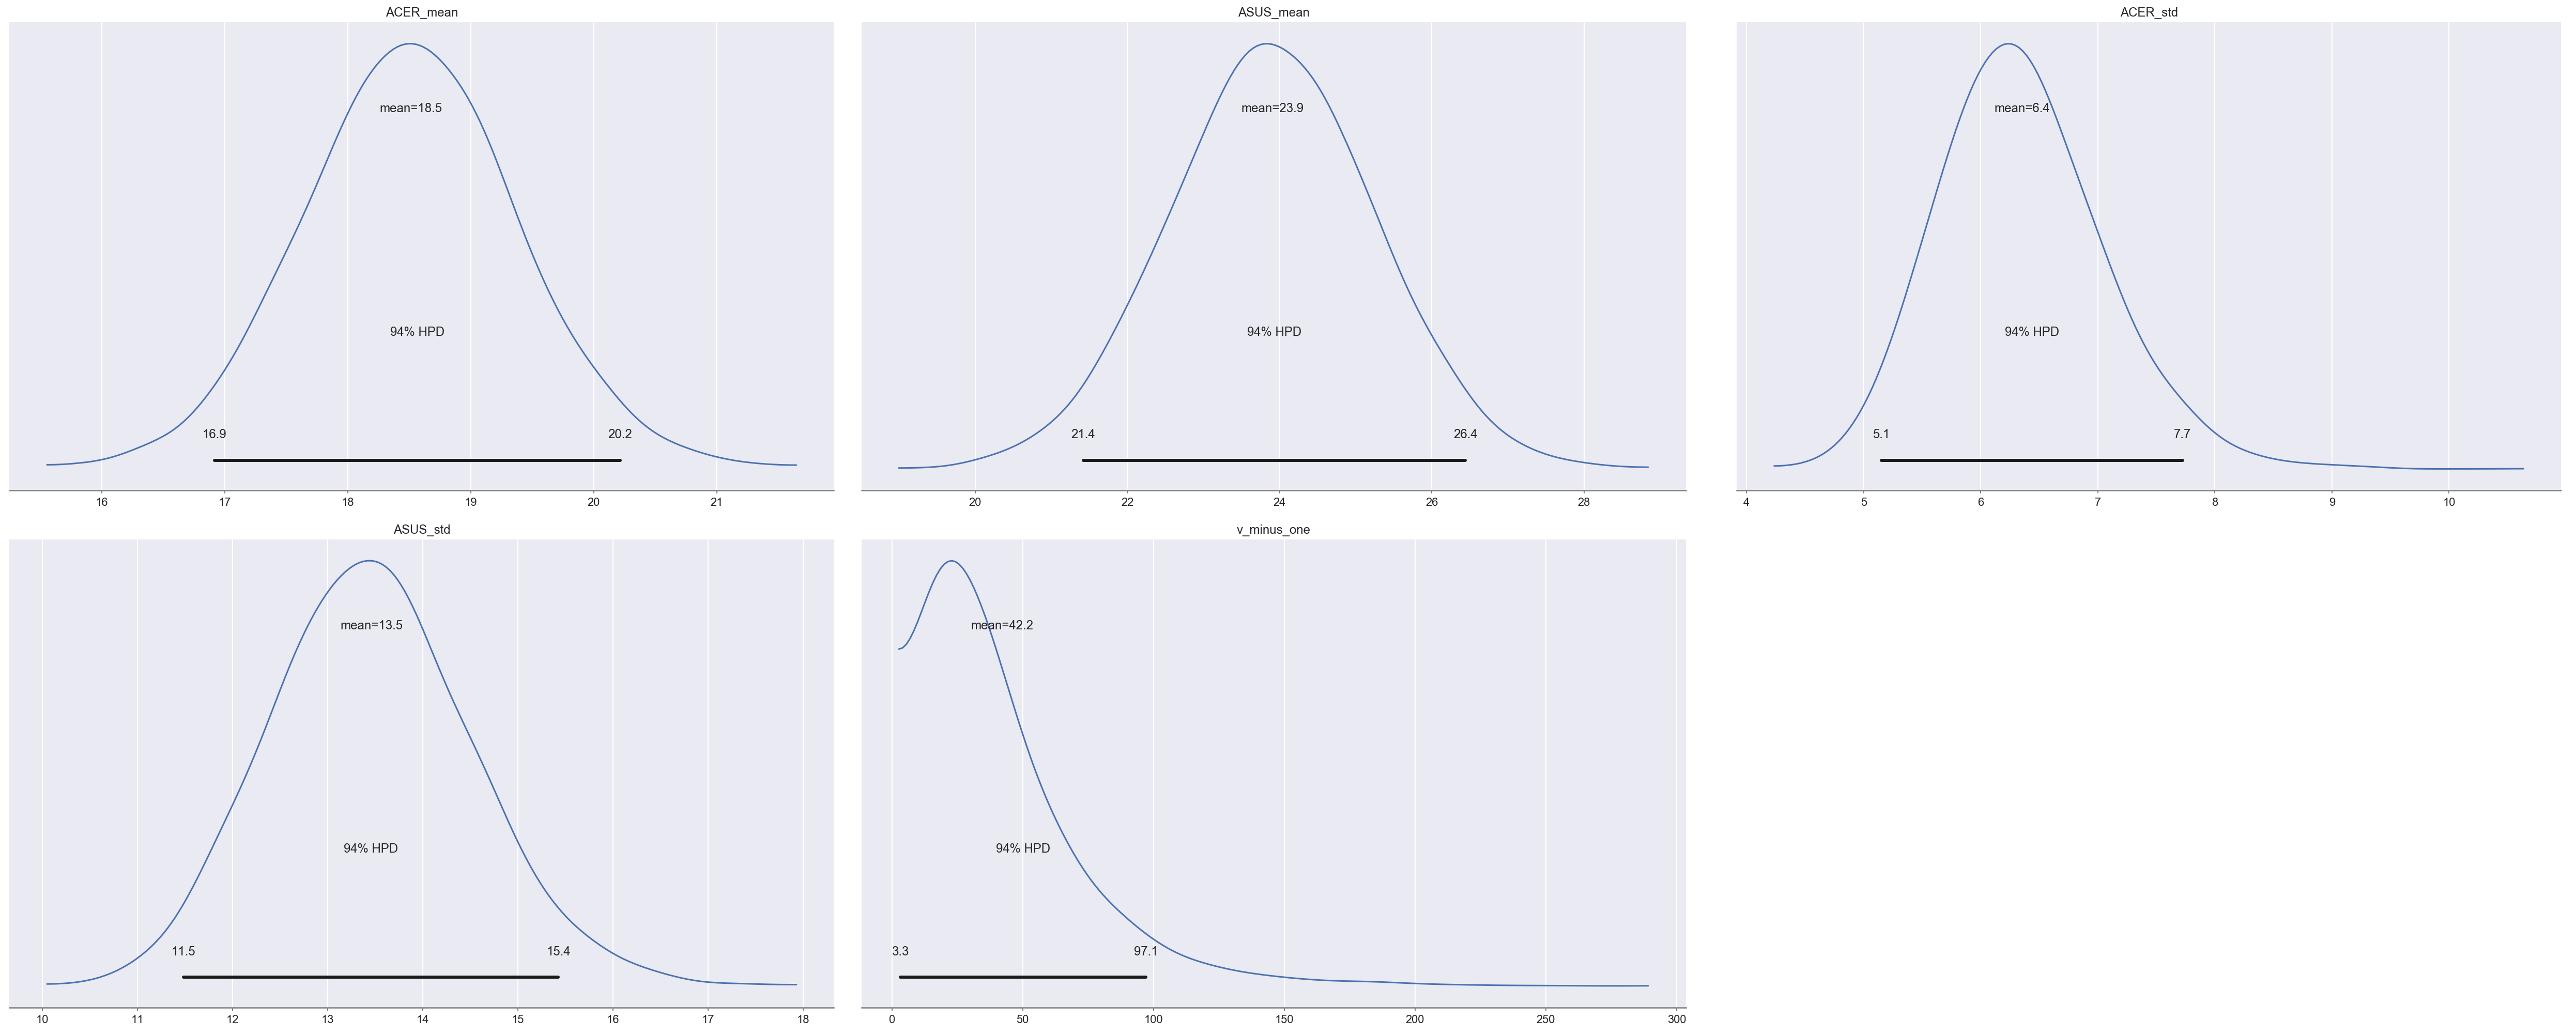

In [101]:
pm.plot_posterior(trace,var_names=['ACER_mean','ASUS_mean', 'ACER_std', 'ASUS_std', 'ν_minus_one'],color='#87ceeb');

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\plots\__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


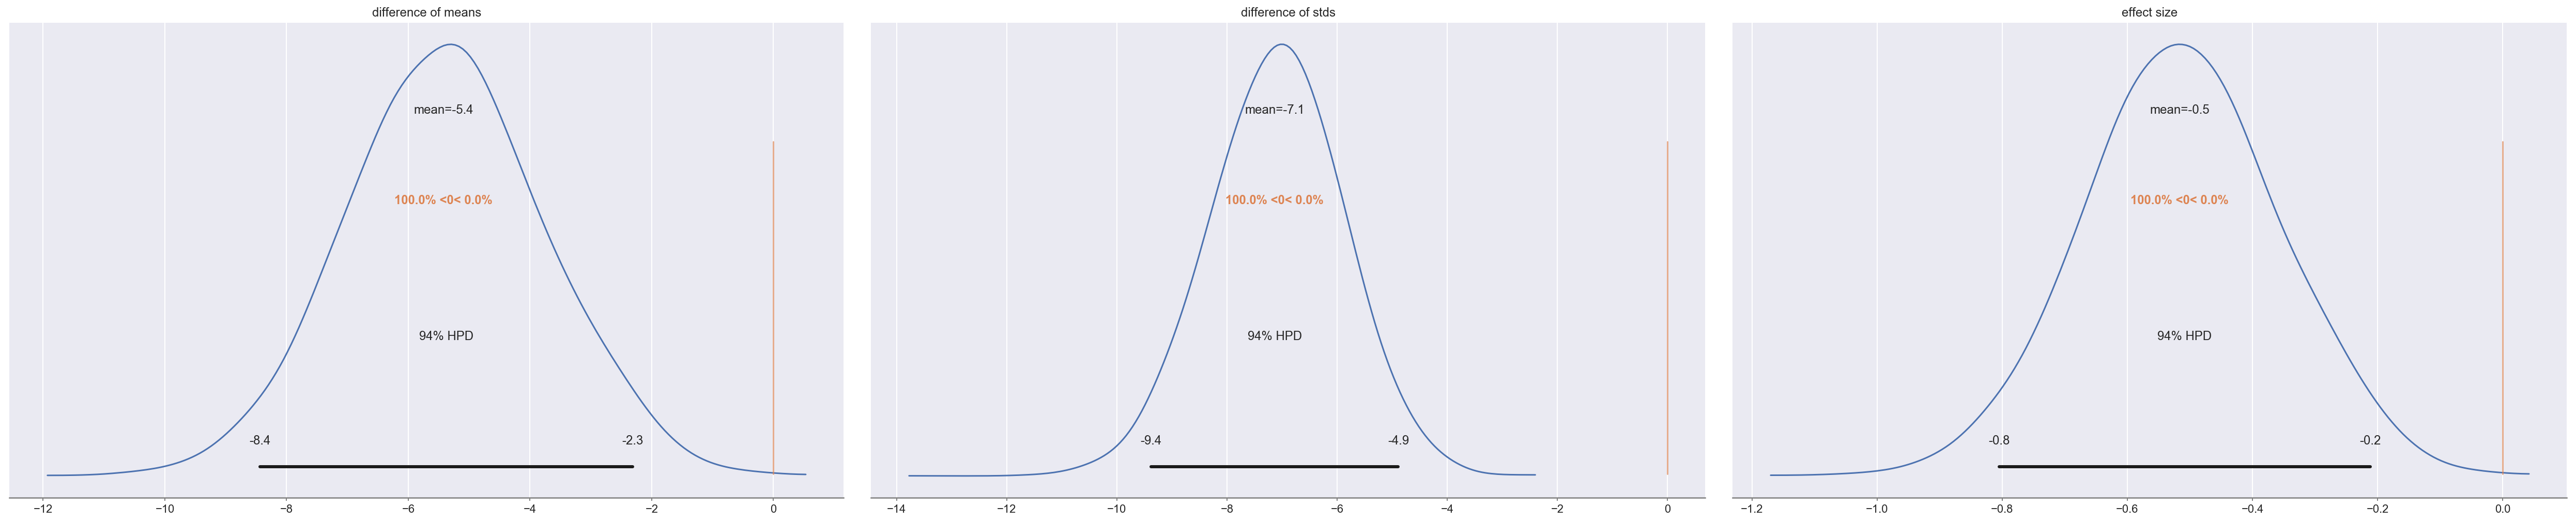

In [80]:
 pm.plot_posterior(trace,varnames=['difference of means','difference of stds', 'effect size'],ref_val=0,color='#87ceeb');

Al utilizar un modelo Jerarquico Bayesiano con 95%  obtenemos los mismos resultados que en el contraste de hipótesis con p_valor=0,05. 
Esto es que no podemos considerar que en media las ventas de ACER y ASUS sean iguales.
